### Problem Statement
"""A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products."""

In [1]:
## Importing datasets

In [2]:
import pandas as pd
import numpy as np

In [3]:
test_data = pd.read_csv("test1.csv")
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
train_data = pd.read_csv("train1.csv")
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
## Working with train dataset

In [6]:
train_data.shape

(550068, 12)

In [7]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sb

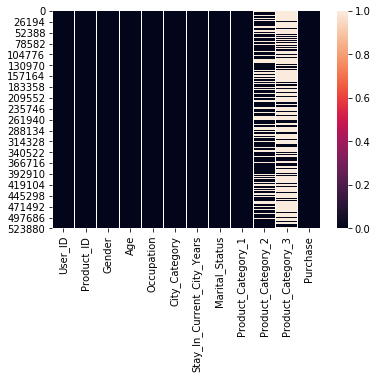

In [11]:
sb.heatmap(train_data.isnull())

- As we can see there are null values present in Product_Category_2 and Product_Category_3 only. We will treat them.  

### Let's see the data types of the columns

In [12]:
train_data.dtypes


User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [13]:
## Selecting categorical Features only from the dataset

In [14]:
categorial_features = train_data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2


In [15]:
## Selecting Numerical Features only from the dataset

In [16]:
numerical_features = train_data.select_dtypes(include=[np.number])
numerical_features.head(2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200


### Let's now check the unique values in the dataset

In [17]:
train_data.apply(lambda x : len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

   - As we can see there are many columns which are having unique values. Like in User_id there are 5891 different Users.
   - We can infer that there are 3631 diffrent types of Product_id in the datasets
   - We can infer that there are 2 diffrent types of Gender in the datasets
   - We can infer that there are 7 diffrent types of Age in the datasets
   - We can infer that there are 21 diffrent types of Occupation in the datasets
   - We can infer that there are 3 diffrent types of City_Category in the datasets
   - We can infer that there are 5 diffrent types of Stay_In_Current_City_Years in the datasets
   - We can infer that there are 2 diffrent types of Marital_Status in the datasets
   - We can infer that there are 20 diffrent types of Product_Category_1 in the datasets
   - We can infer that there are 18 diffrent types of Product_Category_2 in the datasets
   - We can infer that there are 16 diffrent types of Product_Category_3 in the datasets

In [18]:
# Let's see the Frequency of diffrent categories in diffrent columns wise.

for col in categorial_features:
    print('\n%s column: '%col)
    print(train_data[col].value_counts())


Product_ID column: 
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00241842       1
P00160742       1
P00077242       1
P00038642       1
P00074542       1
Name: Product_ID, Length: 3631, dtype: int64

Gender column: 
M    414259
F    135809
Name: Gender, dtype: int64

Age column: 
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

City_Category column: 
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Stay_In_Current_City_Years column: 
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


### Let's see Outlier's in the dataset by ploting it


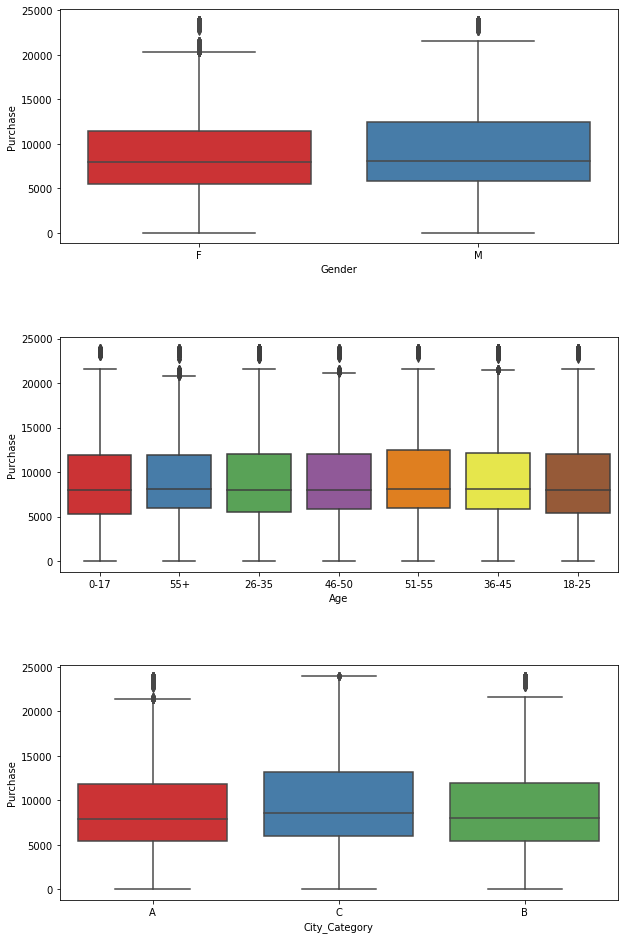

In [19]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sb.boxplot(x='Gender', y='Purchase', data=train_data, palette="Set1")

plt.subplot(312)
sb.boxplot(x='Age', y='Purchase', data=train_data, palette="Set1")

plt.subplot(313)
sb.boxplot(x='City_Category', y='Purchase', data=train_data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [20]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [21]:
train_data[['Product_Category_2']].head()

,Product_Category_2
0,NaN
1,6.0
2,NaN
3,14.0
4,NaN


### Missing values Imputation

In [22]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


- Mean value of Product_Category_2 is 9.8 and that for Product_Category_3 is 12.6, which we will use to fill the missing values in these two columns.

In [23]:
## Imputing Product_Category_2 and Product_Category_3 columns with its mean

In [24]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(train_data.iloc[:, 9:11].values)
train_data.iloc[:,9:11] = imputer.transform(train_data.iloc[:, 9:11].values)
train_data.info() 

C:\Users\SHASHANK\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [25]:
train_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

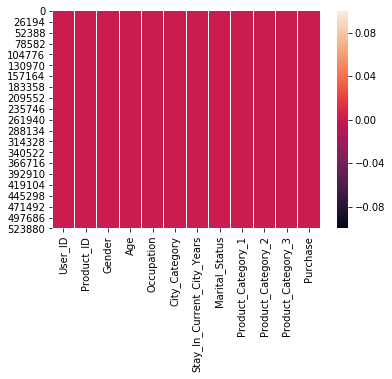

In [26]:
sb.heatmap(train_data.isnull())

- As we can see now there are no null values present in the dataset

In [27]:
train_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.000000,12.668243,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.000000,17.000000,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.000000,12.668243,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.000000,12.668243,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,9.842329,12.668243,7871


- As we can see there are still some special characters, like (+) in the columns 'Age' and 'stay in Current City_Years, which need to be removed, before we aplly machine learning algorithms.

In [28]:
train_data['Age']=(train_data['Age'].str.strip('+'))

In [29]:
train_data['Stay_In_Current_City_Years']=(train_data['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [30]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55,16,C,4.0,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1.0,1,20,9.842329,12.668243,368
550064,1006035,P00375436,F,26-35,1,C,3.0,0,20,9.842329,12.668243,371
550065,1006036,P00375436,F,26-35,15,B,4.0,1,20,9.842329,12.668243,137
550066,1006038,P00375436,F,55,1,C,2.0,0,20,9.842329,12.668243,365


- Now we can see that our dataset is cleaned 

In [31]:
## Lets find correlation between the columns

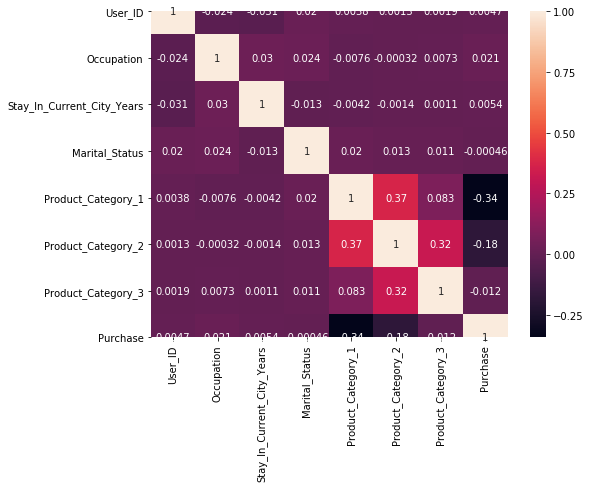

In [32]:
plt.figure(figsize=(8,6))
sb.heatmap(train_data.corr(),annot=True)

- From above we can see the positive correlation coefficients of three features as a function of Purchase:

    - Occupation
    - Stay_In_Current_City_Years
    - Marital Status
    
- So increase in any of the values for the above three features is likey to result in a higher purchase from the customer.

C:\Users\SHASHANK\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


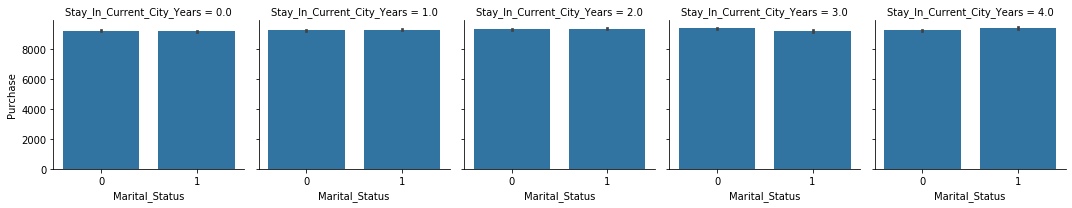

In [33]:
trend = sb.FacetGrid(train_data,col="Stay_In_Current_City_Years")
trend.map(sb.barplot, "Marital_Status", "Purchase")

- By seeing the above plot it is difficult to conclude anything, but it might be useful to analyse if the trend shows something different across the different cities.

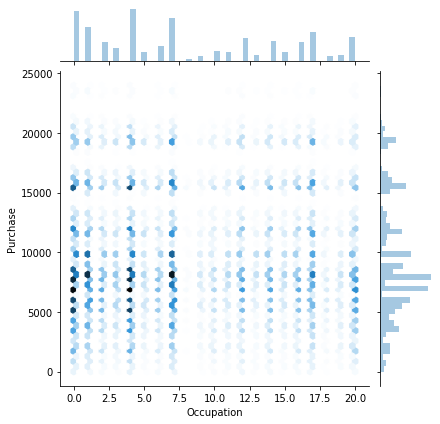

In [34]:
sb.jointplot(x='Occupation',y='Purchase',data=train_data,kind = 'hex')

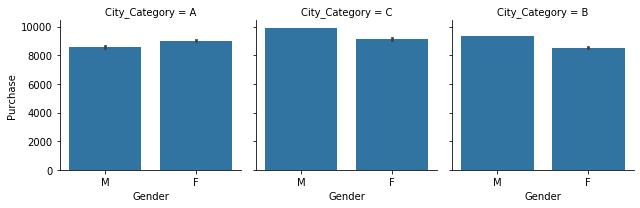

In [35]:
trend1 = sb.FacetGrid(train_data,col="City_Category")
trend1.map(sb.barplot, "Gender", "Purchase")

- 1. Clearly people from City_Category C are showing higher purchase capacity as compared to the other two cities on average.

- 2. For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to puchase more than men. It is a useful insight, and it be useful to oserve which age group of females does higher purchasing.

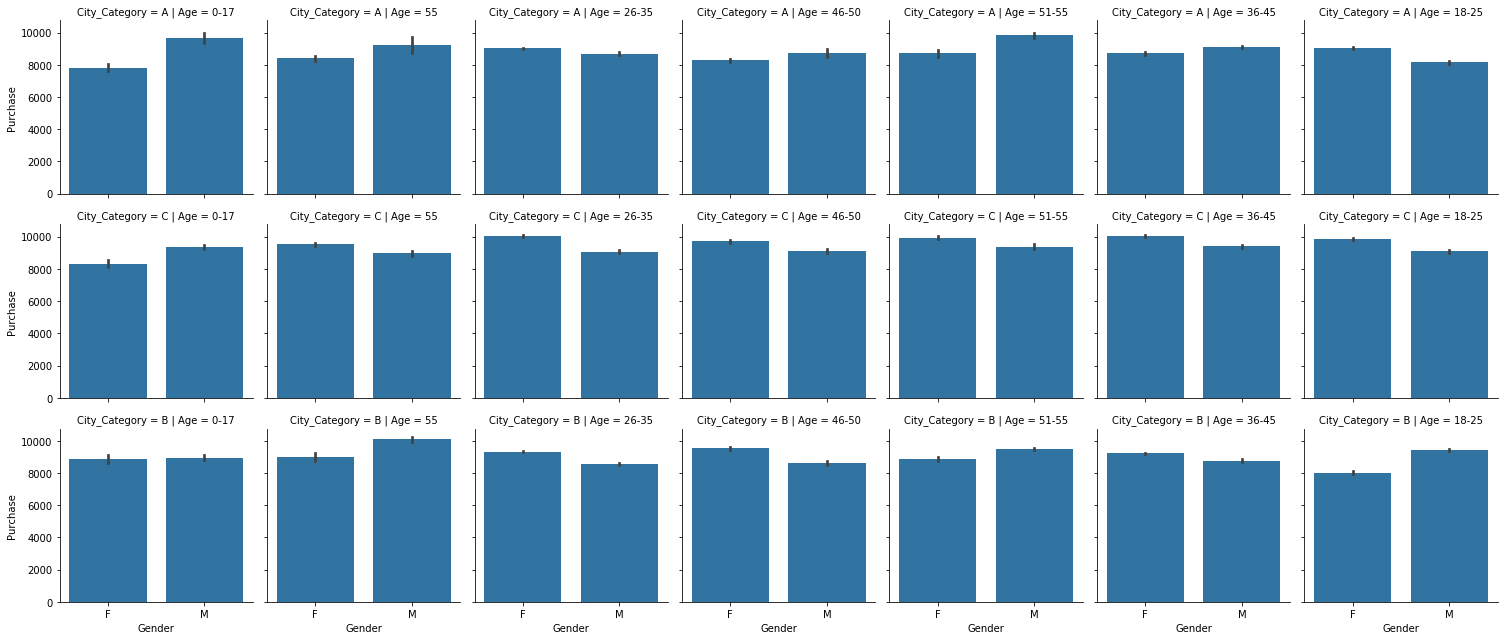

In [36]:
trend2 = sb.FacetGrid(train_data,col="Age",row="City_Category")
trend2.map(sb.barplot, "Gender", "Purchase")

- So, we focus on the first row of the visuaisation, i.e. City_Category_A and then on the bar for females.
- There are two age groups that can be identified with higher purchase, 26-35 and 18-25. Therefore, apart from the male population of all the three city categories, females of City Category A in the above two identifies age groups can be identified as potential buyers for next time around.

In [37]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55,16,C,4.0,0,8,9.842329,12.668243,7969


### Applying Encoding Technique's

In [38]:
#Import library: 

# Applying Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


train_data['Encoded_Gender'] = le.fit_transform(train_data['Gender'])
train_data['Encoded_Age'] = le.fit_transform(train_data['Age'])
train_data['Encoded_City_Category'] = le.fit_transform(train_data['City_Category'])
train_data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Encoded_Gender,Encoded_Age,Encoded_City_Category
0,1000001,P00069042,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370,0,0,0
1,1000001,P00248942,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200,0,0,0
2,1000001,P00087842,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422,0,0,0
3,1000001,P00085442,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057,0,0,0
4,1000002,P00285442,M,55,16,C,4.0,0,8,9.842329,12.668243,7969,1,6,2


#### Dropping un-usefull columns

In [39]:
train_data.drop(['Gender','Age','City_Category','Product_ID','User_ID'],axis = 1, inplace = True)

In [40]:
train_data.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Encoded_Gender,Encoded_Age,Encoded_City_Category
0,10,2.0,0,3,9.842329,12.668243,8370,0,0,0
1,10,2.0,0,1,6.000000,14.000000,15200,0,0,0
2,10,2.0,0,12,9.842329,12.668243,1422,0,0,0
3,10,2.0,0,12,14.000000,12.668243,1057,0,0,0
4,16,4.0,0,8,9.842329,12.668243,7969,1,6,2


In [42]:
X = train_data.drop(["Purchase"],axis=1)   # independent variables
X.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Encoded_Gender,Encoded_Age,Encoded_City_Category
0,10,2.0,0,3,9.842329,12.668243,0,0,0
1,10,2.0,0,1,6.000000,14.000000,0,0,0
2,10,2.0,0,12,9.842329,12.668243,0,0,0
3,10,2.0,0,12,14.000000,12.668243,0,0,0
4,16,4.0,0,8,9.842329,12.668243,1,6,2


In [43]:
X.shape

(550068, 9)

In [44]:
Y = train_data["Purchase"]   # dependent variables
Y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split    #this is used for splitting data into training and testing set
from sklearn.linear_model import LinearRegression       # this is used for LinearRegression
from sklearn.linear_model import Ridge, Lasso

In [62]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
#print(len(x_train),len(x_test),len(y_train),len(y_test))

In [47]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print("ai",reg.coef_)
print("a0=",reg.intercept_)

ai [   6.45293218   10.83348652  -63.25930595 -407.16733257  -85.33390884
   77.50923864  512.00130204  115.46037494  348.65319541]
a0= 10237.095696923447


In [49]:
y_pred = reg.predict(x_test)
y_pred

array([11657.09932461,  6588.86527387,  9806.93668029, ...,
       12138.94444681, 11441.16364767,  9175.36418007])

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 4691.873758525345
R2 Score= 0.12824198819373567


In [51]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.05,normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

print("RMSE= ",rmse,'R2=',r2)

RMSE=  4692.526937086039 R2= 0.1279992479546952


In [52]:
ridgeReg = Ridge(alpha=0.01,normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2=r2_score(y_test,pred)

print("RMSE= ",rmse,'R2=',r2)

RMSE=  4691.897649108224 R2= 0.1282331103504143


#### Applying Polynomial Regression

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly_features= PolynomialFeatures(degree=3)

In [55]:
X = train_data.drop(["Purchase"],axis=1)
x_poly = poly_features.fit_transform(X)


Y = train_data["Purchase"]
x_train, x_cv, y_train, y_cv = train_test_split(x_poly,Y, test_size =0.20,random_state =3)

In [56]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
#print("a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11",reg.coef_)
#print("a0=",reg.intercept_)

In [58]:
y_pred = reg.predict(x_cv)
y_pred

array([ 7218.22534664,  6592.26801022, 13260.30464085, ...,
       12990.70552547,  7791.36414059,  6831.44000729])

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_cv,y_pred))
r2 = r2_score(y_cv,y_pred)

print("RMSE =", rmse)
print("R2 Score=",r2)

RMSE = 4191.557298453095
R2 Score= 0.3035703341150463


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X ,Y, test_size=0.2, random_state=902)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = "gini",max_features="log2", min_samples_split=3, min_samples_leaf=2)
clf.fit(X_train, y_train)
predn=clf.predict(X_test)
print('The accuracy of the model using decision tree is',metrics.accuracy_score(predn,y_test))

In [65]:
X.head(2)

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Encoded_Gender,Encoded_Age,Encoded_City_Category
0,10,2.0,0,3,9.842329,12.668243,0,0,0
1,10,2.0,0,1,6.000000,14.000000,0,0,0


In [66]:
Y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
Xs = SS.fit_transform(X)

In [72]:
from sklearn.decomposition import PCA
pc = PCA(4) #here 4 indicates the number of components you want it into.

In [73]:
principalComponents = pc.fit_transform(X)#Here we are applying PCA to data/fitting data to PCA

In [74]:
pc.explained_variance_ratio_

array([0.49841247, 0.27324749, 0.12448468, 0.05152897])

In [76]:
principalDf = pd.DataFrame(data = principalComponents, columns = ["component 1", "component 2", "component 3", "component 4"])
principalDf.head()

,component 1,component 2,component 3,component 4
0,1.880862,-1.529357,-1.884079,0.250291
1,1.905391,-5.516324,-1.487016,-1.866652
2,1.814980,4.062140,5.128591,-0.466528
3,1.808101,7.254760,2.692418,0.609619
4,7.989622,1.715723,2.092239,-0.255391


In [77]:
from sklearn.model_selection import KFold
kf = KFold(20)
#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [78]:
for a,b in kf.split(principalDf):
    X_train, X_test = Xs[a],Xs[b]
    y_train, y_test = Y[a],Y[b]

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [82]:
fit1 = lr.fit(X_train,y_train)#Here we fit training data to linear regressor
fit2 = dtr.fit(X_train,y_train)#Here we fit training data to Decision Tree Regressor
fit3 = rfr.fit(X_train,y_train)#Here we fit training data to Random Forest Regressor
fit4 = gbr.fit(X_train,y_train)#Here we fit training data to Gradient Boosting Regressor

C:\Users\SHASHANK\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
print("Accuracy Score of Linear regression on train set",fit1.score(X_train,y_train)*100)
print("Accuracy Score of Decision Tree on train set",fit2.score(X_train,y_train)*100)
print("Accuracy Score of Random Forests on train set",fit3.score(X_train,y_train)*100)
print("Accuracy Score of Gradient Boosting on train set",fit4.score(X_train,y_train)*100)

Accuracy Score of Linear regression on train set 11.055860829199649
Accuracy Score of Decision Tree on train set 78.89783209131899
Accuracy Score of Random Forests on train set 77.17920631535159
Accuracy Score of Gradient Boosting on train set 64.05859481285503


In [86]:
print("Accuracy Score of Linear regression on test set",fit1.score(X_test,y_test)*100)
print("Accuracy Score of Decision Tree on test set",fit2.score(X_test,y_test)*100)
print("Accuracy Score of Random Forests on test set",fit3.score(X_test,y_test)*100)
print("Accuracy Score of Gradient Boosting on testset",fit4.score(X_test,y_test)*100)

Accuracy Score of Linear regression on test set 34.05951388777153
Accuracy Score of Decision Tree on test set 66.38591477765654
Accuracy Score of Random Forests on test set 70.47020967215202
Accuracy Score of Gradient Boosting on testset 71.0548075927372
